In [7]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_funds(*filter, min_assets=1, max_expense=1):
    query = 'query screen($filter:[String!]!,$limit:[FundLimitOptionInput!]!){viewer{screenFunds(filterCategory:$filter,limit:$limit,sort:{type:FUND_TOTAL_ASSETS,direction:DESC},first:100){edges{node{symbol}}}}}'
    variables = {'filter':filter,'limit':[{'type':'FUND_TOTAL_ASSETS','min':min_assets*1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':max_expense,'inclusive':True}]}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    return [n['node']['symbol'] for n in r['data']['viewer']['screenFunds']['edges']]

Populating the interactive namespace from numpy and matplotlib


In [8]:
bonds = screen_funds('Bonds', 'Leveraged Debt', min_assets=.01, max_expense=1.2)
equities = screen_funds('Equities', 'Leveraged Equity', min_assets=.01, max_expense=1.2)
print(len(bonds), len(equities))
quote = Quote(bonds + equities, 50, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

4 54
from 2019-05-20 to 2019-07-09 - 58


In [9]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0.2]
print(len(stats))
stats

51


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
RUSL,30,5.163476,3.997765,1.281664,39.303502,3.627551
BRZU,30,7.739933,8.236832,0.934856,81.256021,7.626808
LBJ,30,5.200138,5.616550,0.918795,45.798384,7.729469
GDXX,30,7.545788,9.000686,0.833948,50.631192,12.050224
NUGT,30,11.412205,13.924221,0.816744,81.619331,17.417822
UST,30,0.950553,1.204767,0.756056,5.666152,1.744279
TYD,30,1.357158,1.775104,0.742196,7.823921,2.631067
EDC,30,3.560105,4.808358,0.732146,19.899137,6.267738
EET,30,2.357127,3.202890,0.723548,12.782908,4.515183


evicted URE 0.799 -0.169
evicted UPW 0.704 -0.207
evicted DFEN 0.591 -0.120
evicted CHAU 0.597 -0.059
evicted TECL 0.788 -0.624
evicted LABU 0.450 -0.229
evicted SOXL 0.761 -0.455
evicted JNUG 0.502 -0.236
evicted BRZU 0.482 -0.394
retry backlogs ['EDC', 'RXL', 'CURE', 'TQQQ', 'QLD', 'UYG', 'ROM', 'UCC', 'SPXL', 'URTY', 'EURL', 'DDM', 'USD', 'TNA', 'UPRO', 'XPP', 'SAA', 'PPLC', 'MIDU', 'MVV', 'TMF', 'FAS', 'UBT', 'SSO', 'UBIO', 'UMDD', 'UST', 'NUGT', 'UYM', 'EET', 'UXI', 'UWM', 'UDOW', 'JPNL', 'GDXX', 'DZK', 'BIB', 'LBJ', 'YINN'] at 0.805 - 1.68
evicted YINN 0.656 -0.063
evicted BIB 0.643 -0.310
evicted UYM 0.749 -0.427
evicted USD 0.760 -0.582
evicted GDXX 0.538 -0.170
evicted LBJ 0.465 -0.264
evicted QLD 0.703 -0.711
retry backlogs ['SPXL', 'UXI', 'UYG', 'XPP', 'UMDD', 'RXL', 'DDM', 'UST', 'UWM', 'TNA', 'MVV', 'PPLC', 'UPRO', 'TMF', 'TQQQ', 'SSO', 'URTY', 'ROM', 'UBIO', 'EURL', 'UDOW', 'TYD', 'MIDU', 'EET', 'UCC', 'FAS', 'NUGT', 'JPNL', 'EDC', 'DZK', 'CURE', 'SAA'] at 0.81 - 1.89
evi

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,30.0,2.826056,1.494173,-0.170304,1.773364,2.692983,3.792054,5.918570,1.864827,19.674890,1.952854
RUSL,30.0,5.163476,3.997765,-1.026472,1.649172,5.409609,8.248439,12.665445,1.281664,39.303502,3.627551
UBT,30.0,1.758978,2.486355,-2.935063,0.125215,0.943121,2.725234,7.829477,0.691492,11.412197,3.493592
FINU,30.0,2.221744,6.077968,-7.429561,-1.544863,1.880102,5.440648,13.759826,0.359012,13.336561,12.579854


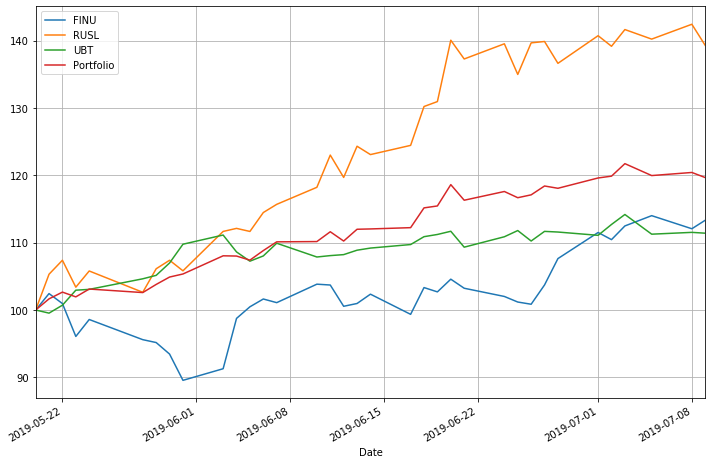

In [10]:
quote.setup_mask(stats.index)
ratio, shrp = quote.optimize_portfolio(.1, backlogs_threshold=.8)
print(ratio, shrp)
quote.setup_mask(ratio)
quote.graph(ratio)

{'SPXL': 0.364, 'TMF': 0.636}


,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,30.0,2.470772,1.772484,-1.485805,1.557537,2.551386,3.609027,6.594213,1.371572,16.257434,2.952764
TMF,30.0,2.579799,3.766013,-4.292014,0.031075,1.276961,4.052572,11.593556,0.674484,17.060714,5.014042
SPXL,30.0,2.531850,6.038381,-8.597486,-0.818108,3.528611,5.936356,16.175773,0.412721,14.853902,12.273395


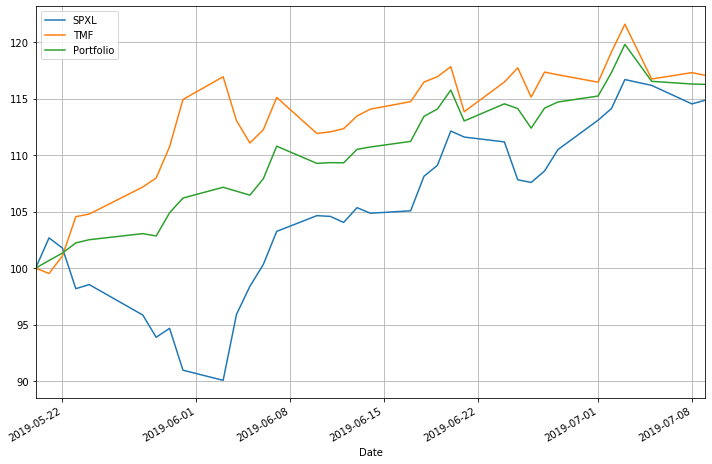

In [11]:
quote2 = Quote(['TMF', 'SPXL'], 50, 5)
ratio, *_ = quote2.find_optimal_ratio()
print(ratio)
quote2.graph(ratio)

{'SSO': 0.361, 'UBT': 0.639}


,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,30.0,1.687677,1.153036,-0.906382,1.104016,1.773890,2.457343,4.316667,1.429265,10.848885,1.980641
UBT,30.0,1.758978,2.486355,-2.935063,0.125215,0.943121,2.725234,7.829477,0.691492,11.412197,3.493592
SSO,30.0,1.674866,4.035770,-5.835048,-0.558107,2.315731,4.012277,10.694173,0.405173,9.851775,8.359706


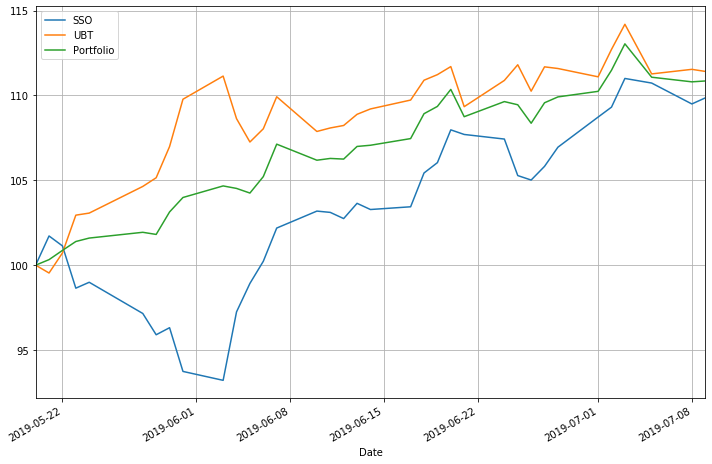

In [12]:
quote2 = Quote(['UBT', 'SSO'], 50, 5)
ratio, *_ = quote2.find_optimal_ratio()
print(ratio)
quote2.graph(ratio)